## To Predict the Accident Severity.
Accidents are one of the leading causes of death worldwide. Due to the increase in population and motorization, the number of accidents worldwide has been increasing. Better prediction of the severity of accidents is essential to improve the safety performance of road traffic systems and reduce such unfortunate accidents.

**For this we are using accident data from uk goverment website "https://www.gov.uk/government/statistical-data-sets/reported-road-accidents-vehicles-and-casualties-tables-for-great-britain"** **"Road Saftey data-accident 2019.csv"**

In [1]:
#importing the base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# 1.Loading the Datasets

In [2]:
#Importing the datasets.
trainset = pd.read_csv("train.csv").drop(['Unnamed: 0'],axis=1) 
testset = pd.read_csv("test.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
#Displaying results
trainset.head()

,Accident_Severity,Number_of_Casualties,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Night,Darkness with lights unlit,...,March,May,November,October,September,Urban,Flood,Frost,Snow,Wet
0,Slight,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Slight,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Slight,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Slight,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Slight,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
#Displaying results
testset.head()

,Accident_Severity,Number_of_Casualties,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Night,Darkness with lights unlit,...,March,May,November,October,September,Urban,Flood,Frost,Snow,Wet
0,Slight,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,Slight,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Serious,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Slight,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Slight,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Checking the dimensions of the datasets
print (trainset.shape)
print (testset.shape)

(17607, 34)
(5826, 34)


# 2.Train Models

In [6]:
#drop labels for training set, but keep all others
#creating separate arrays for the predictors (`Xtrain`) and for the target (`ytrain`):
Xtrain = trainset.drop("Accident_Severity", axis=1)
ytrain = trainset["Accident_Severity"].copy()

#creating separate arrays for the testset (`Xtest`) and for the target (`ytest`):
Xtest = testset.drop("Accident_Severity", axis=1)
ytest = testset["Accident_Severity"].copy()

## 2.1 Baseline Models
We'll use a majority class classifier as a baseline, i.e., we will find out what is the most common class label in the training set and always output it as a prediction.

In [7]:
#Displaying the number of instances belonging to each class
trainset["Accident_Severity"].value_counts()

Slight     14020
Serious     3365
Fatal        222
Name: Accident_Severity, dtype: int64

The baseline classifier will output "Slight" for all predictions. We will use macro-averaging in this project (precision, recall and F-score are evaluated in each class separately and then averaged across classes).

So if we apply the baseline classifier to all of the training set. 

For the "Slight" label, the accuracy measures will be:

* Precision: 14020/17607 = 0.796

* Recall: 14020/14020 = 1.0

* F-score: 2/(1/precision + 1/recall) = 0.886

The averages of the three classes, i.e. the eventual baseline scores:

* **Precision: 0.2653**

* **Recall: 0.3333**

* **F-score: 0.2953**

## 2.2 Logistics Regression Model Using Grid Search

**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [8]:
#Importing Grid search library functions
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# specifying the hyperparameter
grid={"C":[100,10,1.0,0.1,0.01],"penalty":["l1","l2"]}# l1 lasso l2 ridge

#loading LogisticRegression
logreg=LogisticRegression()

# 5 fold cross validation used
logreg_cv=GridSearchCV(logreg,grid,cv=5,
                      scoring='f1_macro', 
                      return_train_score=True) 

start = time.time()
logreg_cv.fit(Xtrain,ytrain)
end = time.time() - start
print(f"Took {end} seconds")

/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score o

/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.29552808        nan 0.29552808        nan 0.29552808
        nan 0.29552808        nan 0.29552808]
  warnings.warn(
/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan 0.29552808        nan 0.29552808        nan 0.29552808
        nan 0.29552808        nan 0.29552808]
  warnings.warn(


Took 9.335018157958984 seconds


/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#displaying best estimators for logistic regression
logreg_cv.best_estimator_


LogisticRegression(C=100)

**Using Grid-search we found that Best estimator for logistic regression is (c=100)**

In [10]:
#Displaying the best score
logreg_cv.best_score_

0.29552808431814326

The achieve the F-score of **0.295**,which is not a good score and it is equal to the basline model result which was **0.295**. One of the reason for low score could be imbalanced data or may be this model is not suited for this dataset.

In [11]:
#displyaing rank of best performing model
logreg_cv.cv_results_["rank_test_score"].tolist().index(1)

1

In [12]:
#This code will store the best model in each split for future use.
log_split_test_scores = []
for x in range(5):
    
# extract f-score of the best model (index=1) from each of the 5 splits 
    val = logreg_cv.cv_results_[f"split{x}_test_score"][1] 
    log_split_test_scores.append(val)

In [13]:
#Now cross validating our results(the score achieved in train score with validation score)
val_scores = logreg_cv.cv_results_["mean_test_score"]
train_scores = logreg_cv.cv_results_["mean_train_score"]
params = [str(x) for x in logreg_cv.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

nan nan {'C': 100, 'penalty': 'l1'}
0.29552808431814326 0.29552808265629865 {'C': 100, 'penalty': 'l2'}
nan nan {'C': 10, 'penalty': 'l1'}
0.29552808431814326 0.29552808265629865 {'C': 10, 'penalty': 'l2'}
nan nan {'C': 1.0, 'penalty': 'l1'}
0.29552808431814326 0.29552808265629865 {'C': 1.0, 'penalty': 'l2'}
nan nan {'C': 0.1, 'penalty': 'l1'}
0.29552808431814326 0.29552808265629865 {'C': 0.1, 'penalty': 'l2'}
nan nan {'C': 0.01, 'penalty': 'l1'}
0.29552808431814326 0.29552808265629865 {'C': 0.01, 'penalty': 'l2'}


**Now we can see the score is almost same for train and validation set in almost all parameters and there is no sign of underfitting and overfitting**

In [14]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(logreg_cv.best_estimator_, 'models/lr-clf.joblib')

['models/lr-clf.joblib']

## 2.3 Random Forest Model using Grid Search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [15]:
#Importing Grid search library functions
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Loading RandomForestClassifier
rf = RandomForestClassifier()

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10],
    'random_state': [7]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 153.51374888420105 seconds


In [16]:
#Displaying the best estimators
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=10,
                       random_state=7)

**The best hyperparameters prove to be `n_estimators=10`, `max_depth=15` and `min_sample_split=5`. They achieve the F-score of **0.299**,which is not a good score but still slightly better than basline model which was **0.295**.

In [17]:
#Displaying the best result of this algoritham
grid_search.best_score_

0.2992230800456154

In [18]:
#This code will generate the rank of best performing model in this algoritham.
grid_search.cv_results_["rank_test_score"].tolist().index(1)

16

In [19]:
#This code will store the best model in each split for future use.
rf_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index=18) from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][16]
    rf_split_test_scores.append(val)

In [20]:
#This code will generate all results of random forest with all parameters for further analysis
val_scores = grid_search.cv_results_["mean_test_score"]
train_scores = grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.2992230800456154 0.3339597346850811 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 7}
0.2970797295101349 0.31688327264368665 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 7}
0.2967758932271479 0.31724248463870597 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 7}
0.29667088374061673 0.31481074470674064 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 7}
0.29614222618672814 0.30723721338988996 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 10, 'random_state': 7}
0.2959162656608636 0.30066156005350353 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 7}
0.29586841738895864 0.30190980346264534 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 7}
0.2957090978489833 0.3006620231987386 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 1000, 'random_state': 7}
0.29552808431814326 0.29568

#### we can see above that F-score almost remain the same for max_depth 3 to 15, but the best score was at max_depth 15 and n_estimators 10. However, at higher values of this hyperparameter, we notice some evidence of overfitting: the performance on training parts is slightly better than on the validation part.

In [21]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

Night: 0.09488051450906831
Wet: 0.08907322821499625
Urban: 0.06617088307234317
Raining: 0.06515094151981839
Daylight: 0.061746347207961835
Sunday: 0.043626772599536255
Visible: 0.03938980842474845
No High Winds: 0.039206221054966746
Saturday: 0.035450856223896945
Other: 0.03511784436187076
Tuesday: 0.034277446506207954
Thursday: 0.03420119187786092
Monday: 0.0300314351296972
Wednesday: 0.028331745216058062
October: 0.02616762575077648
September: 0.02478768409291058
March: 0.023817534149787274
November: 0.023166718604556238
December: 0.02194169088622779
August: 0.02028114475258125
January: 0.01833162017016314
February: 0.01804118415444334
July: 0.017917331771007895
Frost: 0.01714938233604834
June: 0.017066501816935625
Darkness with lights unlit: 0.0168185162665959
May: 0.01587744234803188
Darkness with no lighting: 0.013716845438261061
Fog or mist: 0.012964633082942998
Snowing: 0.007721045575954828
Flood: 0.00468953379225679
Snow: 0.002888329091487357
Number_of_Casualties: 0.0


#### The important feature for this model are area(Urban) Road condition(wet) and Time(Night) and least important features are Number_of_Casualties, Months(jan-december)etc.

In [22]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/rf-clf.joblib')

['models/rf-clf.joblib']

## 2.4 Random Forest Model with Over Sampling Using Grid Search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

As our data is highly imbalanced so this may be the reason the models are not performing well so we will try to balance the data with SMOTE technique.

Classic Oversampling-In this sampling the data which is less is duplicated increasing the total number of data and does not give any new information, and it is very Time consuming if the data is too large. 

SMOTE - Synthetic Minority Oversampling Technique

This technique is used for oversampling the data but different from classic oversampling technique.This uses K-nearest neighbour algoritham.In this technique the dataset of minority class will be made equal to majority class.

In [23]:
#For oversampling of Target variable we are using smote
from imblearn.over_sampling import SMOTE

In [24]:
#Giving all values equal to majority class to all three categories in our target variable
df = SMOTE(random_state = 3, sampling_strategy= {"Fatal":14020,"Serious":14020, "Slight":14020})

In [25]:
#Displaying the results
df

SMOTE(random_state=3,
      sampling_strategy={'Fatal': 14020, 'Serious': 14020, 'Slight': 14020})

In [26]:
#Reshaping the data and creating "Xtrain_o" and "ytrain_o"
Xtrain_o, ytrain_o = df.fit_resample(Xtrain,ytrain)

In [27]:
from sklearn.model_selection import GridSearchCV


#importing RandomForestClassifier library function
from sklearn.ensemble import RandomForestClassifier

#Loading RandomForestClassifier
rf = RandomForestClassifier()

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10],
    'random_state': [7]
}

# we'll use 5-fold cross-validation
grid_search_o = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search_o.fit(Xtrain_o, ytrain_o)
end = time.time() - start
print(f"Took {end} seconds")

Took 405.24688720703125 seconds


In [28]:
#Displayibg the best estimator of the model
grid_search_o.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200,
                       random_state=7)

In [29]:
#Displaying the best score of the model
grid_search_o.best_score_

0.7367259859307174

The best score we got is 73.67 % which is much better than baseline model with best estimators RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200,
                       random_state=7).

In [30]:
#This code will generate the rank of best performing model in this algoritham.
grid_search_o.cv_results_["rank_test_score"].tolist().index(1)

18

In [31]:
#This code will store the best model in each split for future use.
rfo_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index=18) from each of the 5 splits
    val = grid_search_o.cv_results_[f"split{x}_test_score"][18]
    rfo_split_test_scores.append(val)

In [32]:
#This code will generate all results of random forest with all parameters for further analysis
val_scores = grid_search_o.cv_results_["mean_test_score"]
train_scores = grid_search_o.cv_results_["mean_train_score"]
params = [str(x) for x in grid_search_o.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.7367259859307174 0.770327638649544 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 7}
0.735259718094021 0.7693189528874306 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 7}
0.7339445340637681 0.7663228871030804 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 7}
0.7334101898934541 0.7682485281709168 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 7}
0.7333812224908314 0.7654321312903585 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 1000, 'random_state': 7}
0.7300015645884234 0.7637901912762886 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 7}
0.713768519620236 0.7484696598395021 {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 7}
0.7093902332422473 0.7443415881006699 {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 10, 'random_state': 7}
0.5151999325098577 0.5226534805318518 {

The performance of Random Forest Model with Over Sampling varies a lot across the runs,the accuracy is 0.4510 to 0.7367 across runs.In particular, we notice that the best performance is achieved with max depth and min samples split. In this model we notice overfitting as the performance on training parts is slightly better than as on the validation part.

In [33]:
# put them into a separate variable for convenience
feature_importances = grid_search_o.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

Urban: 0.14696626244109207
Night: 0.07142242167277107
Wet: 0.06442997193173287
Daylight: 0.05046764814749343
Thursday: 0.04442778718968812
Raining: 0.043866496254905955
July: 0.043860035767904024
Monday: 0.03836346923611518
January: 0.035743783169415046
November: 0.03560680263952786
Sunday: 0.03513129918409347
February: 0.03325933680951725
October: 0.03244034935755542
Visible: 0.029191425081565615
Saturday: 0.029101616861384554
Wednesday: 0.028984731897671583
Tuesday: 0.0287340074269549
Darkness with no lighting: 0.02685082713164018
September: 0.025459311964189418
June: 0.025135920515018166
December: 0.021606688053839567
May: 0.021043593452267244
March: 0.020507605239521824
Other: 0.017181832558748764
No High Winds: 0.01670352479058616
August: 0.01434938140543167
Fog or mist: 0.007680002858318951
Frost: 0.004521879754008683
Darkness with lights unlit: 0.004122400302532875
Snowing: 0.0018002885498671448
Flood: 0.000558680890390433
Snow: 0.0004806174642506614
Number_of_Casualties: 0.0


Important features according to this model are Urban(Urban or Rural), Night(Time) and wet(Road condition).

Least Important features according to this model are Number_of_Casualties, snow.

In [34]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search_o.best_estimator_, 'models/rfo-clf.joblib')

['models/rfo-clf.joblib']

## 2.5 Linear Support Vector Machines with Grid search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [35]:
#Importing Grid search
from sklearn.model_selection import GridSearchCV

#Importing Linear svc
from sklearn.svm import LinearSVC

lsvm = LinearSVC()

# specify the hyperparameters and their values
# 5 combinations in the grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 5],
    'max_iter': [5000],
    'random_state': [7]
}    

# we'll use 5-fold cross-validation
l_grid_search = GridSearchCV(lsvm, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
l_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 25.778316974639893 seconds


In [36]:
#Displaying best Estimators of this model
l_grid_search.best_estimator_

LinearSVC(C=0.001, max_iter=5000, random_state=7)

In [37]:
#Displaying best score of this model
l_grid_search.best_score_

0.29552808431814326

The best score we got is 29.55 %  which is slight better than baseline model with best estimators SLinearSVC(C=0.001, max_iter=5000, random_state=7).

In [38]:
#Displaying the best performing model rank index
l_grid_search.cv_results_["rank_test_score"].tolist().index(1)

0

In [39]:
#This code will store the best model in each split for future use.
ls_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index=0) from each of the 5 splits
    val = l_grid_search.cv_results_[f"split{x}_test_score"][0]
    ls_split_test_scores.append(val)

In [40]:
#This code will generate all results of random forest with all parameters for further analysis
val_scores = l_grid_search.cv_results_["mean_test_score"]
train_scores = l_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in l_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.29552808431814326 0.29552808265629865 {'C': 5, 'max_iter': 5000, 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 3, 'max_iter': 5000, 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 1, 'max_iter': 5000, 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 0.1, 'max_iter': 5000, 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 0.01, 'max_iter': 5000, 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 0.001, 'max_iter': 5000, 'random_state': 7}


The performance of Linear Support Vector Machines did not varies a lot across the runs,the accuracy is 0.2955 across all runs.In particular, we notice that same performance is achieved with any type of parameters". In this model we did not notice any type of overfitting as the performance on training parts is almost same as on the validation part.

In [41]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(l_grid_search.best_estimator_, 'models/ls-clf.joblib')

['models/ls-clf.joblib']

## 2.6 Linear Support Vector Machines Grid Search with over sampling
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

HERE WE ARE USING THE SAME DATA WHICH IS USED ABOVE FOR RANDOM FOREST USING SMOTE

In [42]:
#Importing linear SVC FROM sklearn.svm
from sklearn.svm import LinearSVC

lsvm = LinearSVC()

# specify the hyperparameters and their values
# 5 combinations in the grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 5],
    'max_iter': [5000],
    'random_state': [7]
}    

# we'll use 5-fold cross-validation
lo_grid_search = GridSearchCV(lsvm, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
lo_grid_search.fit(Xtrain_o, ytrain_o)
end = time.time() - start
print(f"Took {end} seconds")

Took 64.36532211303711 seconds


In [43]:
#Displaying best estimator
lo_grid_search.best_estimator_

LinearSVC(C=1, max_iter=5000, random_state=7)

In [44]:
#Displaying best score of the model
lo_grid_search.best_score_

0.43842011162453876

The best score we got is 43.84 % which is far better than baseline model with best estimators LinearSVC(C=1, max_iter=5000, random_state=7).

In [45]:
#Displaying the best performing model rank index
lo_grid_search.cv_results_["rank_test_score"].tolist().index(1)

3

In [46]:
#This code will store the best model in each split for future use.
lo_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index=3) from each of the 5 splits
    val = lo_grid_search.cv_results_[f"split{x}_test_score"][3]
    lo_split_test_scores.append(val)

In [47]:
#Recording the scores achieved by all the models in the search grid:
val_scores = lo_grid_search.cv_results_["mean_test_score"]
train_scores = lo_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in lo_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.43842011162453876 0.4398627254595381 {'C': 1, 'max_iter': 5000, 'random_state': 7}
0.4383312660841945 0.43991166602005605 {'C': 3, 'max_iter': 5000, 'random_state': 7}
0.4383306137748419 0.4399129820985907 {'C': 5, 'max_iter': 5000, 'random_state': 7}
0.43786364957523827 0.43970381380730483 {'C': 0.1, 'max_iter': 5000, 'random_state': 7}
0.43727179906857866 0.43927045713001533 {'C': 0.01, 'max_iter': 5000, 'random_state': 7}
0.4337141052199618 0.43626207441202514 {'C': 0.001, 'max_iter': 5000, 'random_state': 7}


The performance of Linear Support Vector Machines with over sampling did not varies a lot across the runs, between 0.4337 and 0.4384 In particular, we notice that better performance is achieved with lower values of "C". In this model we did not notice any type of overfitting as the performance on training parts is almost same as on the validation part.

In [48]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(lo_grid_search.best_estimator_, 'models/lo-clf.joblib')

['models/lo-clf.joblib']

## 2.7 Radial Basis Function using Grid Search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [49]:
#Importing SVM from sklearn.svm
from sklearn.svm import SVC

svm = SVC()

# specify the hyperparameters and their values
# 6 x 3 = 18 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
    'kernel': ["rbf"],
    'random_state': [7]
}

# we'll use 5-fold cross-validation
rb_grid_search = GridSearchCV(svm, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
rb_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 2288.219531059265 seconds


In [50]:
#Displaying best estimator
rb_grid_search.best_estimator_

SVC(C=100, random_state=7)

In [51]:
#Displaying best score
rb_grid_search.best_score_

0.3111366672685156

The best score we got is 31.11% still better than baseline model with best estimators SVC(C=100, random_state=7).

In [52]:
#Displaying the best performing model rank index
rb_grid_search.cv_results_["rank_test_score"].tolist().index(1)

12

In [53]:
#recording the results of the best model in each split, for future reference.
rb_split_test_scores = []
for x in range(5):
# extract f-score of the best model (index=12) from each of the 5 splits 
    val = rb_grid_search.cv_results_[f"split{x}_test_score"][12] 
    rb_split_test_scores.append(val)

In [54]:
#Let's review the scores achieved by all the models in the search grid:
val_scores = rb_grid_search.cv_results_["mean_test_score"]
train_scores = rb_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in rb_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.3111366672685156 0.4439131000048964 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7}
0.3020562784976847 0.38687286137706417 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 7}
0.2962515708956872 0.3366629204208859 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 7}
0.29552808431814326 0.29552808265629865 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf

The performance of Radial basis function varies a lot across the runs, between 0.2955 and 0.3111 In particular, we notice that better performance is achieved with higher values of "C". However, at higher values of this hyperparameter, we notice some evidence of overfitting: the performance on training parts is considerably better than on the validation part.

In [55]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(rb_grid_search.best_estimator_, 'models/rb-clf.joblib')

['models/rb-clf.joblib']

## 2.8 Polynomial SVM using Grid Search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [56]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Importing SVM
from sklearn.svm import SVC

svm_poly = SVC(kernel="poly", gamma="scale", random_state=7)

# specify the hyperparameters and their values
# 6 x 3 = 18 combinations in the grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'degree': [2],
}

# we'll use 5-fold cross-validation
poly_grid_search = GridSearchCV(svm_poly, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
poly_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 312.99900698661804 seconds


In [57]:
#Displaying best estimators
poly_grid_search.best_estimator_

SVC(C=100, degree=2, kernel='poly', random_state=7)

In [58]:
#Displaying best score
poly_grid_search.best_score_

0.29656597575743315

The best score we got is 29.65% still better than baseline model with best estimators SVC(C=100, degree=2, kernel='poly', random_state=7)

In [59]:
#Displaying the best performing model rank index
poly_grid_search.cv_results_["rank_test_score"].tolist().index(1)

4

In [60]:
#recording the results of the best model in each split, for future reference.
poly_split_test_scores = []
for x in range(5):
# extract f-score of the best model (index=4) from each of the 5 splits 
    val = poly_grid_search.cv_results_[f"split{x}_test_score"][4] 
    poly_split_test_scores.append(val)

In [61]:
#Let's review the scores achieved by all the models in the search grid:
val_scores = poly_grid_search.cv_results_["mean_test_score"]
train_scores = poly_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in poly_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.29656597575743315 0.32787033166313506 {'C': 100, 'degree': 2}
0.29582384353225877 0.29869371580605825 {'C': 10, 'degree': 2}
0.29552808431814326 0.29552808265629865 {'C': 1, 'degree': 2}
0.29552808431814326 0.29552808265629865 {'C': 0.1, 'degree': 2}
0.29552808431814326 0.29552808265629865 {'C': 0.01, 'degree': 2}


The performance of polynomial SVM varies a lot across the runs, between 0.2955 and 0.2965 In particular, we notice that better performance is achieved with higher values of "C". However, at higher values of this hyperparameter, we notice some evidence of overfitting: the performance on training parts is considerably better than on the validation part.

In [62]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(poly_grid_search.best_estimator_, 'models/poly-clf.joblib')

['models/poly-clf.joblib']

## 2.9 KNN Using Grid Search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [63]:
#Importing GridSearchCV from sklearn.model_selection library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = {"n_neighbors": range(1, 50)}

# we'll use 5-fold cross-validation
k_grid_search = GridSearchCV(knn, parameters, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
k_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 1068.671002149582 seconds


In [64]:
#Displaying best estimator 
k_grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [65]:
#Displaying best score
k_grid_search.best_score_

0.3390360693248141

The best score we got is 33.90% still better than baseline model with best estimators KNeighborsClassifier(n_neighbors=1)

In [66]:
#Displaying the best performing model rank index
k_grid_search.cv_results_["rank_test_score"].tolist().index(1)

0

In [67]:
#Let's record the results of the best model in each split, for future reference.
k_split_test_scores = []
for x in range(5):
# extract f-score of the best model (index=0) from each of the 5 splits 
    val = k_grid_search.cv_results_[f"split{x}_test_score"][0] 
    k_split_test_scores.append(val)

In [68]:
#Let's review the scores achieved by all the models in the search grid:
val_scores = k_grid_search.cv_results_["mean_test_score"]
train_scores = k_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in k_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.3390360693248141 0.47198606668372733 {'n_neighbors': 1}
0.33234622628213684 0.40663371448377267 {'n_neighbors': 4}
0.32812352408760914 0.460962649423266 {'n_neighbors': 2}
0.32747717084545 0.4283224824835526 {'n_neighbors': 3}
0.3269122261394226 0.374188333217655 {'n_neighbors': 6}
0.32308413471157615 0.3501385524726267 {'n_neighbors': 8}
0.3230053382047545 0.36966871588312344 {'n_neighbors': 5}
0.31607283085467464 0.3370740342732999 {'n_neighbors': 7}
0.31517813311661724 0.33200400050433265 {'n_neighbors': 10}
0.3104265091623169 0.3233718622016645 {'n_neighbors': 9}
0.3097407275428552 0.31951549935352974 {'n_neighbors': 12}
0.30632866030695666 0.314754108388568 {'n_neighbors': 11}
0.3050004611928568 0.31240112895557465 {'n_neighbors': 14}
0.3035352552774536 0.309083646535388 {'n_neighbors': 13}
0.30089078739467073 0.30606973414662997 {'n_neighbors': 16}
0.30083609693874347 0.30489136553554835 {'n_neighbors': 15}
0.29863513617832804 0.3033155433133065 {'n_neighbors': 18}
0.2985630808

The performance of knn varies a lot across the runs, between 0.29 and 0.3390 In particular, we notice that better performance is achieved with lower values of n_neighbors. However, at higher values of this hyperparameter, we notice some evidence of overfitting: the performance on training parts is considerably better than on the validation part.

In [69]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(k_grid_search.best_estimator_, 'models/knn-clf.joblib')

['models/knn-clf.joblib']

## 2.10 Descision tree Using Grid Search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [70]:
#Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

descision = DecisionTreeClassifier()

#specifying the hyper-parametrs and their values
param = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,100)
   
}
# we'll use 5-fold cross-validation
d_grid_search = GridSearchCV(descision, param, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
d_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 101.18449211120605 seconds


In [71]:
#Displaying the best estimators
d_grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=82)

In [72]:
#Displying the best score of this model
d_grid_search.best_score_

0.3352798239543235

The best score we got is 33.52% still better than baseline model with best estimators DecisionTreeClassifier(criterion='entropy', max_depth=82)

In [73]:
#Displaying the best performing model rank index
d_grid_search.cv_results_["rank_test_score"].tolist().index(1)

180

In [74]:
d_split_test_scores = []
for x in range(5):
# extract f-score of the best model (index=180) from each of the 5 splits 
    val = d_grid_search.cv_results_[f"split{x}_test_score"][180] 
    d_split_test_scores.append(val)

In [75]:
#Let's review the scores achieved by all the models in the search grid:
val_scores = d_grid_search.cv_results_["mean_test_score"]
train_scores = d_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in d_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.3352798239543235 0.516959359685351 {'criterion': 'entropy', 'max_depth': 82}
0.33514109493829775 0.516959359685351 {'criterion': 'entropy', 'max_depth': 34}
0.33513872421000124 0.516959359685351 {'criterion': 'entropy', 'max_depth': 78}
0.33507541526100726 0.516959359685351 {'criterion': 'entropy', 'max_depth': 84}
0.33493874346622543 0.516959359685351 {'criterion': 'entropy', 'max_depth': 60}
0.3348065260290693 0.516959359685351 {'criterion': 'entropy', 'max_depth': 89}
0.33479679428065945 0.5167076248808573 {'criterion': 'entropy', 'max_depth': 27}
0.33371796605931386 0.5030012021695842 {'criterion': 'entropy', 'max_depth': 21}
0.3332773403015534 0.516959359685351 {'criterion': 'gini', 'max_depth': 99}
0.3332423766374758 0.516959359685351 {'criterion': 'entropy', 'max_depth': 66}
0.3331689839098572 0.516959359685351 {'criterion': 'entropy', 'max_depth': 42}
0.3331396607586707 0.516959359685351 {'criterion': 'entropy', 'max_depth': 29}
0.3331178183320136 0.516959359685351 {'criterio

The performance of Decision tree classifiers varies a lot across the runs, between 0.29 and 0.33. In particular, we notice that better performance is achieved with greater values of max_depth. However, at higher values of this hyperparameter, we notice some evidence of overfitting: the performance on training parts is considerably better than on the validation part.

In [76]:
# put them into a separate variable for convenience
feature_importances = d_grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

Wet: 0.11493820290649132
Night: 0.07285132708165853
Raining: 0.07078758712826407
Tuesday: 0.04822930787564663
Thursday: 0.04245949135093552
Wednesday: 0.036817181887156485
No High Winds: 0.03541194844623431
Visible: 0.034751714541261754
Daylight: 0.03439751872718033
Monday: 0.03426193513412502
January: 0.033270638910824483
September: 0.031291934033193816
October: 0.03127037168440578
August: 0.03091610630308548
March: 0.030275356090448895
November: 0.029270884727498572
Other: 0.029078130091947044
Sunday: 0.027194016421734253
June: 0.02650202166387926
December: 0.024995272969447486
Saturday: 0.024679369260915112
Urban: 0.023821041855641416
February: 0.023687788569838174
July: 0.020559730770109197
Frost: 0.019476105702973517
May: 0.016548459080408626
Darkness with lights unlit: 0.015311740779336296
Darkness with no lighting: 0.012430924987446182
Fog or mist: 0.011285265168420204
Snowing: 0.007493082560717993
Flood: 0.0038977040470239044
Snow: 0.0018378392417501975
Number_of_Casualties: 0.

Top 3 important features of this model are wet(Road condition), Night(Time), Raining(weather)
Least important features are Flood(Road condition), snow and Number of casualties

In [77]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(d_grid_search.best_estimator_, 'models/dt-clf.joblib')

['models/dt-clf.joblib']

## 2.11 Gradient Boosting Classifier using Grid Search
**We are using grid serach CV library function, it helps in getting best model by doing Hyperparameter tunning automatically on mentioned parameters and gives us the best parameters.**

In [78]:
#Importing grid serach from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

#Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

#specifying the hyper-parametrs and their values
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

# we'll use 5-fold cross-validation
gb_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, 
                           scoring='f1_macro',return_train_score=True)

start = time.time()
gb_search.fit(Xtrain,ytrain)
end = time.time() - start
print(f"Took {end} seconds")

/Users/piyushchaudhary/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Took 1973.9077842235565 seconds


In [79]:
#displaying the best estimators for this model
gb_search.best_estimator_

GradientBoostingClassifier(max_depth=9, n_estimators=1000, subsample=0.5)

In [80]:
#Displaying the best score (accuracy)
gb_search.best_score_

0.3243654899710668

The best score we got is 32.43% still better than baseline model with best estimators GradientBoostingClassifier(max_depth=9, n_estimators=1000, subsample=0.5)

In [81]:
#Displaying the best performing model rank index
gb_search.cv_results_["rank_test_score"].tolist().index(1)

78

In [82]:
gb_split_test_scores = []
for x in range(5):
# extract f-score of the best model (index=78) from each of the 5 splits 
    val = gb_search.cv_results_[f"split{x}_test_score"][78] 
    gb_split_test_scores.append(val)

In [83]:
#Let's review the scores achieved by all the models in the search grid:
val_scores = gb_search.cv_results_["mean_test_score"]
train_scores = gb_search.cv_results_["mean_train_score"]
params = [str(x) for x in gb_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.3243654899710668 0.4827494093881091 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5}
0.3236765730740103 0.4825099931446825 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.7}
0.31932362556197 0.47132285282499 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1.0}
0.3182350731974497 0.4705977975415386 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}
0.31806526116348566 0.4863500237724249 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}
0.3170882824827664 0.48287756825428224 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.5}
0.317071767093978 0.4596957215556565 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.5}
0.3155939254129743 0.4598971674405378 {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}
0.31538252432057495 0.4575316771390957 {'learning_rate': 0.1, 'max_d

The performance of Gradient boosting classifiers varies a lot across the runs, between 0.29 and 0.32. In particular, we notice that better performance is achieved with greater values of `max_depth`. However, at higher values of this hyperparameter, we notice some evidence of overfitting: the performance on training parts is considerably better than on the validation part.

In [84]:
# put them into a separate variable for convenience
feature_importances = gb_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

Urban: 0.0990726516970581
Night: 0.0968513899084105
Wet: 0.08731539874549142
Daylight: 0.07900413885341173
Raining: 0.07585337387561703
Tuesday: 0.03774327863543693
Sunday: 0.03760218516312455
Saturday: 0.03741038233052027
Monday: 0.03711209131805721
Thursday: 0.036023294663145355
Wednesday: 0.0351178488544191
Visible: 0.03502629224369002
Darkness with no lighting: 0.03301321997882094
No High Winds: 0.025309630662257162
October: 0.020762944976114434
January: 0.02061680174196086
September: 0.01996014456820348
August: 0.01989443401155624
November: 0.01983506353292343
December: 0.01884864259958577
Other: 0.018221157180847894
July: 0.01795333401115377
May: 0.01708033697426926
March: 0.016675092156103778
June: 0.016047876640337813
February: 0.01564827884723011
Frost: 0.010571619609647118
Darkness with lights unlit: 0.004380113644846227
Fog or mist: 0.00368389816363814
Snowing: 0.0029079388506622317
Snow: 0.0026527254948946186
Flood: 0.0018044200665645975
Number_of_Casualties: 0.0


Top 3 important feature of this model are urban, night and wet.

In [85]:
#This code is storing the model in "joblib" function for future reference, as again running the model 
#from scratch will be very time consuming, so to save time we are doing this
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(gb_search.best_estimator_, 'models/gbb-clf.joblib')

['models/gbb-clf.joblib']

# 3. Testing the best models
**Now we will compare our top performing models on testset to test the accuracy of our models**

#### Top Performing Models
1. Random Forest with oversampling
2. Linear Support Vector Machine with Oversampling
3. KNN
4. Descision Tree Classifier


In [86]:
#Loading the models which we have saved earlier while modelling to save our time
from joblib import load
best_rf_o = load("models/rfo-clf.joblib")
lsvm_o = load("models/lo-clf.joblib")
knn_u = load("models/knn-clf.joblib")
des_tree_u = load("models/dt-clf.joblib")

## 1.Random Forest with oversampling

In [93]:
#Importing precision, recall and fscore from sklearn.metrics library
from sklearn.metrics import precision_recall_fscore_support

yhat = best_rf_o.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Random Forest with over Sampling:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest with over Sampling:
Precision: 0.3479296567603231
Recall: 0.3592729592714116
F score: 0.3479480381653001


Here we can see F score is very low only 34.79% of test records are predicted corretly, the score of predicting positive value (precision) is also very low only 35.92% of positive records predicted correct.

Also f score is better on training data as compare to test data which suggest overfitting in the model

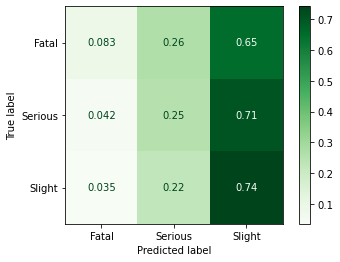

In [90]:
#Importing confusion matrix from sklearn.metrics
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_rf_o, Xtest, ytest,
cmap=plt.cm.Greens, normalize='true')


By looking at above confusion matrix it can be concluded that this model predicting slight accident with 74% accuracy but not able to predict serious and fatal accident precisely. And 22% of slight accident are predicted as serious. 25% of serious and 8.3 % of fatal accident predicted correctly.

Most of the accident are predicetd as slight by this model which is a concern.

## 2. Linear Support Vector Machine with Oversampling

In [94]:
#Importing precision, recall and fscore from sklearn.metrics library
from sklearn.metrics import precision_recall_fscore_support

yhat = lsvm_o.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Linear Support Vector Machine with Oversampling:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Linear Support Vector Machine with Oversampling:
Precision: 0.34694190097426664
Recall: 0.40589609257310305
F score: 0.28477717749660697


Here we can see F score is very low only 28.47% of test records are predicted corretly, the score of predicting positive value (precision) is also very low only 50.58% of positive records predicted correct.

Also f score is better on training data as compare to test data which suggest overfitting in the model

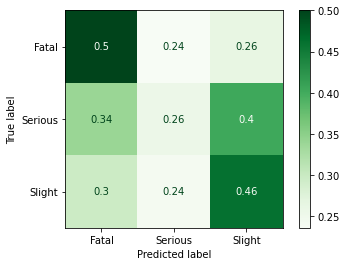

In [95]:
#Importing confusion matrix from sklearn.metrics
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lsvm_o, Xtest, ytest,
cmap=plt.cm.Greens, normalize='true')


Here in above confusion matrix we can see that any type of accident severity is not predicted accurately only 50% of fatal accident 26% of serious accident and 46% of slight accident predicted correctly.This model predicting fatal accident better than any other model which is a good thing as prediction of fatal severity is more improtant as it can have serious damages and loss as copmare to slight and serious severities.

## 3. K-Nearest Neighbour

In [96]:
#Importing precision, recall and fscore from sklearn.metrics library
from sklearn.metrics import precision_recall_fscore_support

yhat = knn_u.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("KNN:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

KNN:
Precision: 0.34200702508581804
Recall: 0.3426056190685826
F score: 0.341966469187595


Here we can see F score is very low only 34.19% of test records are predicted corretly, the score of predicting positive value (precision) is also very low only 34.26% of positive records predicted correct.

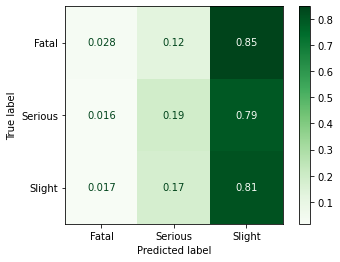

In [97]:
#Importing confusion matrix from sklearn.metrics
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_u, Xtest, ytest,
cmap=plt.cm.Greens, normalize='true')

Here in above confusion matrix we can see that only slight accident predicted with good accuracy of 81% and serious and fatal with 19% and 12% respectively. 17% of slight accident predicted as serious, and 79% of serious accident predicted as slight and 85% of fatal accident as slight which is not good for prediction.

Most of the accident predicted as slight by this model, which is a major concern to look out.

## 4. Descision Tree Classifier

In [98]:
#Importing precision, recall and fscore from sklearn.metrics library
from sklearn.metrics import precision_recall_fscore_support

yhat = des_tree_u.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Descision Tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Descision Tree:
Precision: 0.3573773357240322
Recall: 0.34047023715351576
F score: 0.32744408598551417


Here we can see F score is very low only 32.74% of test records are predicted corretly, the score of predicting positive value (precision) is also very low only 34.00% of positive records predicted correct.

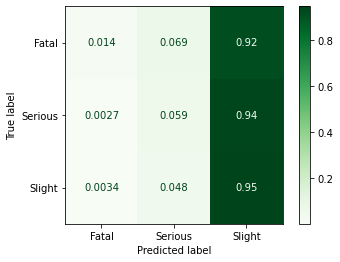

In [99]:
#Importing confusion matrix from sklearn.metrics
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(des_tree_u, Xtest, ytest,
cmap=plt.cm.Greens, normalize='true')

Here in above confusion matrix we can see that only slight accident predicted with good accuracy of 95% and serious and fatal with 5.9% and 6.9% respectively. 4.8% of slight accident predicted as serious, and 94% of serious accident predicted as slight and 92% of fatal accident as slight which is not good for prediction.

Most of the accident predicted as slight by this model, which is a major concern to look out.

# Conclusion

**The Random Forest Classifier** with over sampling revealed to be the best model. Further research should be devoted to such a model, namely fine-tuning the percentage of data. This performed marginally better than the baseline. However, the F-score on the test set is very low this may be due to overfitting.

Same thing goes for Linear Support Vector Machine with Oversampling here some sort of overfitting is visible and  the result of Knn is almost same on train and test data.

**So Random Forest Classifier is the best model for predicting accident severity its very good in predicting slight and serious type of accident severity but not fatal type of accident, so I would not recommend this model to use it in real time based enviroment infact further research is needed to develop a model that increases its capacity to forecast serious and fatal incidents**.

Further improvements in variables is required to improve accuracy of the models.

## Real world Scenario
By looking at the performance of our top model I dont think its better to deploy it in real world scenario as further improvements required to make it more accuarte.If we deploy it now than we can not fully rely on this model as if this model predict wrong than this may be result in loss of time and money 